In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sma
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### Dropping dataset index column

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Univariate Analysis

In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

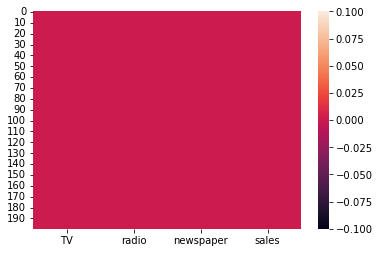

In [9]:
sns.heatmap(df.isnull())

There are no null values in the data

In [10]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

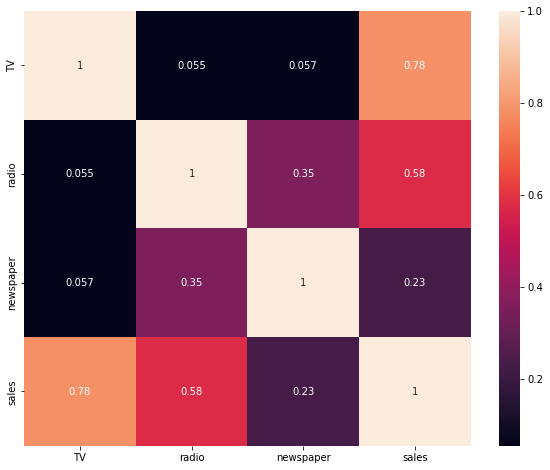

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

There is high correlation between TV and sales which means TV sales contribute most to total sales

In [12]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


There is high standard deviation in all columns which means there are outliers.
The mean and medians are close to each other in values meaning there are outliers present.

In [14]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

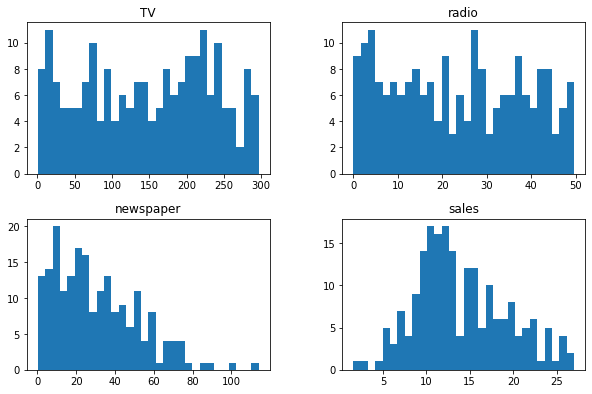

In [16]:
df.hist(figsize=(10,10), grid=False, layout=(3, 2), bins = 30)

There is slight skewness in newspaper but it is less than 1.

Text(0.5, 1.0, 'Newspaper')

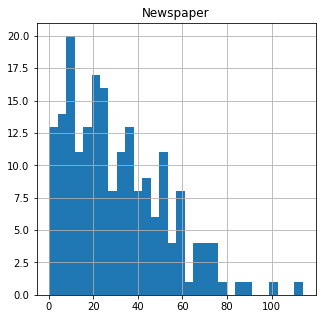

In [17]:
df['newspaper'].hist(figsize=(5,5), bins=30)
plt.title('Newspaper')

Slight skewness present

Text(0.5, 1.0, 'TV')

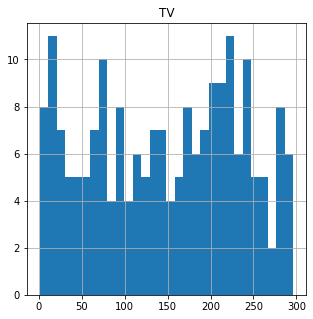

In [18]:
df['TV'].hist(figsize=(5,5), bins=30)
plt.title('TV')

No skewness but the range is quite high.

Text(0.5, 1.0, 'radio')

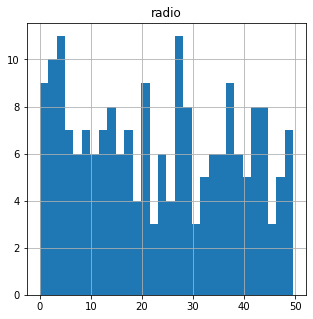

In [19]:
df['radio'].hist(figsize=(5,5), bins=30)
plt.title('radio')

No skewness but there are very low sales at certain points.

Text(0.5, 1.0, 'sales')

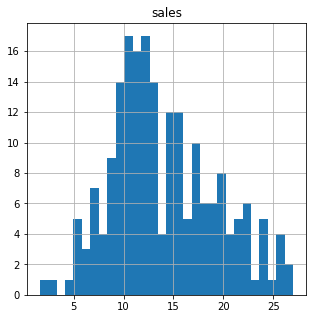

In [20]:
df['sales'].hist(figsize=(5,5), bins=30)
plt.title('sales')

Target variable sales is overall normally distributed.

Text(0.5, 1.0, 'Outliers in the columns')

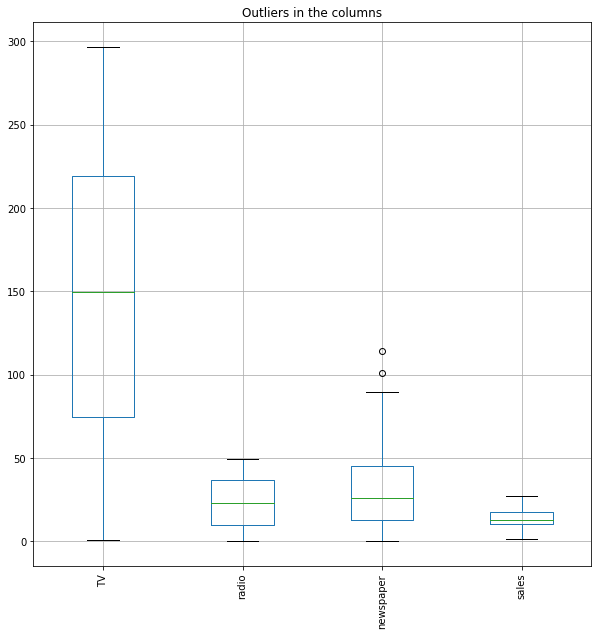

In [21]:
df.boxplot(figsize=(10,10))
plt.xticks(rotation= 90)
plt.title('Outliers in the columns')

There are only outliers in newspaper column

<AxesSubplot:>

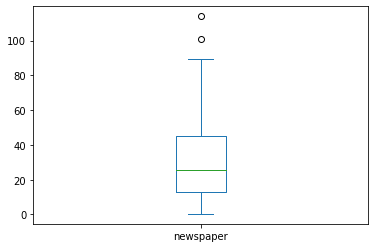

In [22]:
df['newspaper'].plot.box()

Very few outliers are present

<AxesSubplot:>

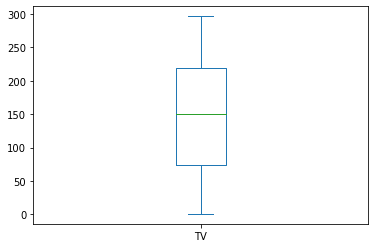

In [23]:
df['TV'].plot.box()

No outliers

<AxesSubplot:>

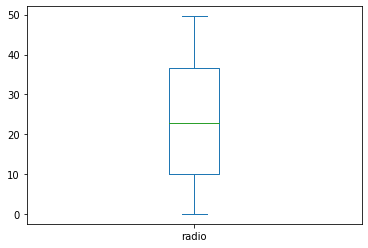

In [24]:
df['radio'].plot.box()

No outliers

<AxesSubplot:>

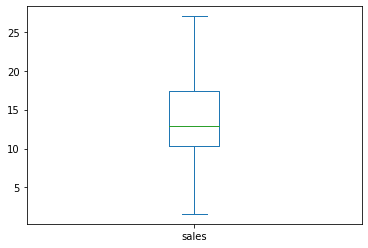

In [25]:
df['sales'].plot.box()

No outliers

<AxesSubplot:ylabel='sales'>

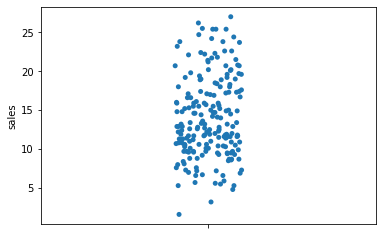

In [26]:
sns.stripplot(y=df['sales'])

Sales values are evenly distributed throughout the range

<AxesSubplot:xlabel='sales'>

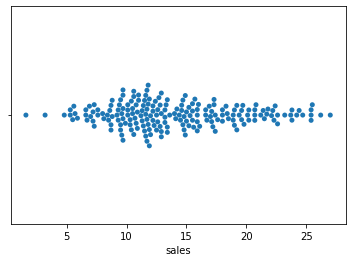

In [27]:
sns.swarmplot(x=df['sales'])

Sales values are mostly evenly distributed throughout the range

<AxesSubplot:xlabel='TV', ylabel='Density'>

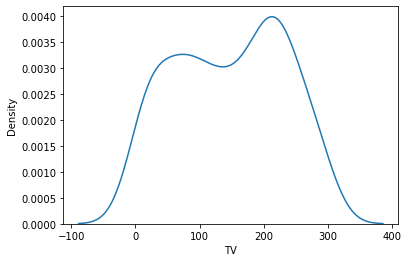

In [28]:
sns.kdeplot(df['TV'])

The distribution is normal, with a slight dip around the 150 sales mark.

<AxesSubplot:xlabel='radio', ylabel='Density'>

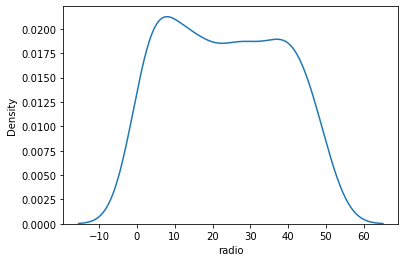

In [29]:
sns.kdeplot(df['radio'])

Mostly normal distribution with peak around 10

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

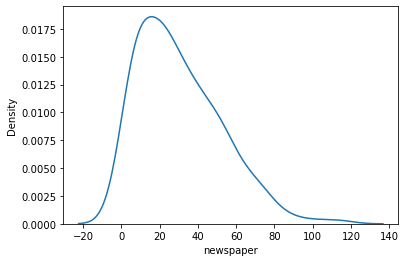

In [30]:
sns.kdeplot(df['newspaper'])

Right skewed due to the outliers we saw above.

<AxesSubplot:xlabel='sales', ylabel='Density'>

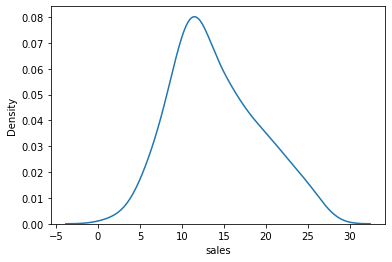

In [31]:
sns.kdeplot(df['sales'])

Normally distributed

## Bivariate Analysis

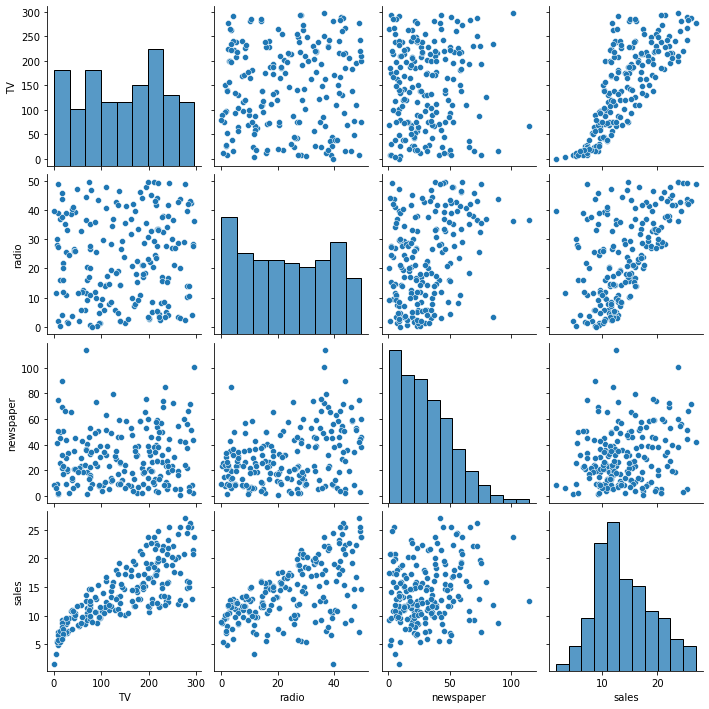

In [32]:
sns.pairplot(df)

Radio and TV have no correlation. They are randomly scattered.
TV and newspaper have no correlation. They are randomly scattered.

Radio and Newspaper have some correlation. Their sales are influenced by each other.

Sales is mostly influenced by TV.

Text(0, 0.5, 'Sales')

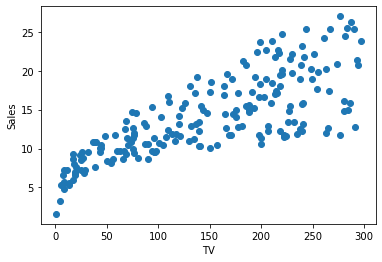

In [33]:
plt.scatter(x=df['TV'],y=df['sales'])
plt.xlabel('TV')
plt.ylabel('Sales')

They are quite positively correlated. As TV sales increases, total sales increases too

Text(0, 0.5, 'Sales')

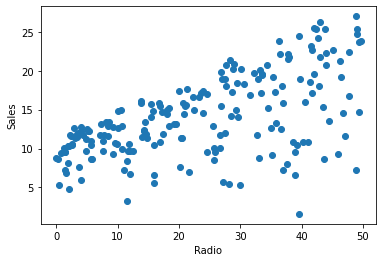

In [34]:
plt.scatter(x=df['radio'],y=df['sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')

Radio and Sales are also positively correlated but not to the same extent as TV and sales

Text(0, 0.5, 'Sales')

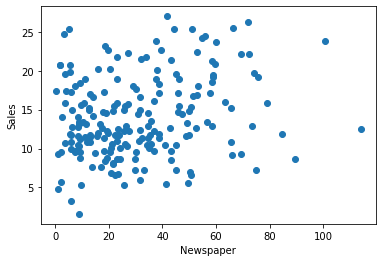

In [35]:
plt.scatter(x=df['newspaper'],y=df['sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')

Lowest correlation compared to TV and Radio. They are still somewhat positively correlated but not much.

<AxesSubplot:xlabel='TV', ylabel='sales'>

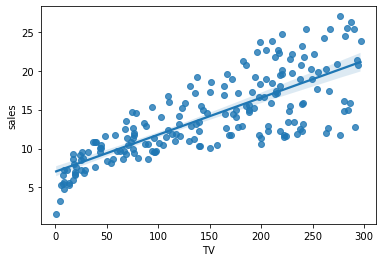

In [36]:
sns.regplot('TV','sales',df)

High positive correlation between TV and sales

<AxesSubplot:xlabel='radio', ylabel='sales'>

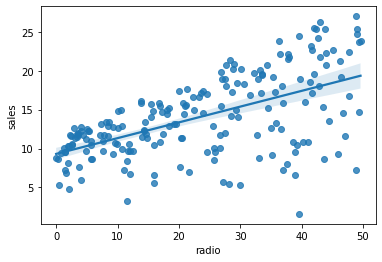

In [37]:
sns.regplot('radio','sales',df)

Positive correlation between radio and sales but we can see the line is flatter than the above line so the correlation is less

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

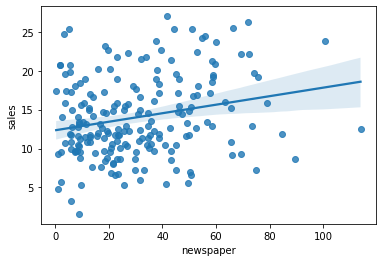

In [38]:
sns.regplot('newspaper','sales',df)

We can see the line is flatter than the above two lines indicating lower correlation

<AxesSubplot:xlabel='radio', ylabel='newspaper'>

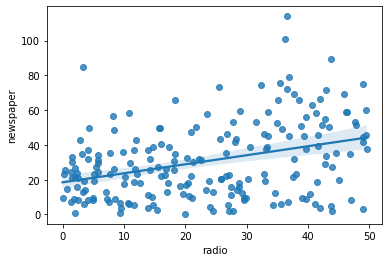

In [39]:
sns.regplot('radio','newspaper',df)

Somewhat positively correlated

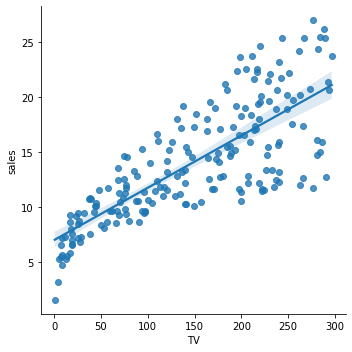

In [41]:
sns.lmplot('TV', 'sales',df)

High positive correlation between TV and sales

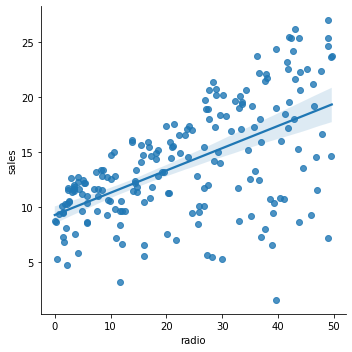

In [43]:
sns.lmplot('radio', 'sales',df)

Positive correlation between radio and sales but we can see the line is flatter than the above line so the correlation is less

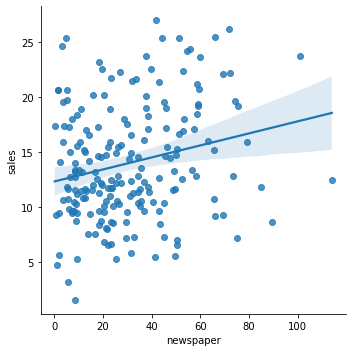

In [44]:
sns.lmplot('newspaper', 'sales',df)

We can see the line is flatter than the above two lines indicating lower correlation

## Skewness

In [45]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Very minimal skewness so we don't have to remove it.

## Checking for multicollinearity with Variance Inflation Factor

In [46]:
def vif_calc():
    vif = pd.DataFrame()
    vif['variables'] = df[0:-1].columns
    vif['VIF FACTOR'] = [variance_inflation_factor(df[0:-1].values,i) for i in range(df[0:-1].shape[1])]
    return vif

In [47]:
vif_calc()

,variables,VIF FACTOR
0,TV,23.131016
1,radio,12.567187
2,newspaper,3.156412
3,sales,55.172504


Very low amount so we can leave this as it is.

<AxesSubplot:>

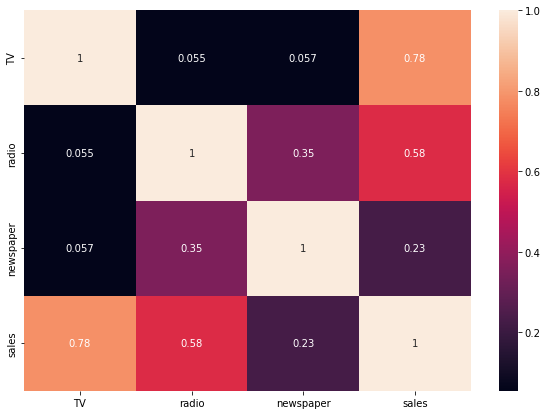

In [48]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

## Removing outliers

TV              AxesSubplot(0.125,0.536818;0.352273x0.343182)
radio        AxesSubplot(0.547727,0.536818;0.352273x0.343182)
newspaper          AxesSubplot(0.125,0.125;0.352273x0.343182)
sales           AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

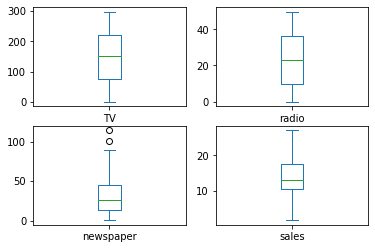

In [52]:
df.plot(kind='box', subplots=True, layout=(2, 2))

In [51]:
z = np.abs(zscore(df))

print(np.where(z > 3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [53]:
df.shape

(200, 4)

In [54]:
len(np.where(z > 3)[0])

2

In [55]:
len(np.where(z > 3)[1])

2

In [56]:
df = df[(z<3).all(axis=1)]

In [57]:
df.shape

(198, 4)

## Splitting data for training and testing

In [58]:
x = df.iloc[:,0:-1]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [59]:
y = df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

#### Models

In [66]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
en = ElasticNet()
knn = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [67]:
models = [lr, ridge, lasso, en, knn, svr, dtr, rf]

In [62]:
best_random_state = 0
lowest_error = 100
for i in range(100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=i)
    lr.fit(xtrain,ytrain)
    pred = lr.predict(xtest)
    error = mean_squared_error(ytest, pred)
    print(f'At random score {i}, mean squared error is {error}')
    if error < lowest_error:
        lowest_error = error
        best_random_state = i
print(f'Lowest error is {lowest_error} at random state {best_random_state}')

At random score 0, mean squared error is 2.4320766824695417
At random score 1, mean squared error is 2.82606328494809
At random score 2, mean squared error is 4.657565039971954
At random score 3, mean squared error is 2.70237922045113
At random score 4, mean squared error is 2.221264027181796
At random score 5, mean squared error is 3.2046978563552537
At random score 6, mean squared error is 3.7505236839855085
At random score 7, mean squared error is 2.9285137407398807
At random score 8, mean squared error is 4.647892114438802
At random score 9, mean squared error is 2.273586649624774
At random score 10, mean squared error is 6.472265672945653
At random score 11, mean squared error is 2.0757429363901525
At random score 12, mean squared error is 2.6533893382706504
At random score 13, mean squared error is 3.775067476876701
At random score 14, mean squared error is 3.5013177100932302
At random score 15, mean squared error is 2.369092663254934
At random score 16, mean squared error is 2.7

#### Choosing 24 as random state

In [63]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=24)

In [79]:
for i in models:
    i.fit(xtrain,ytrain)
    pred = i.predict(xtest)
    error = mean_squared_error(ytest, pred)
    training_score = cross_val_score(i, xtrain, ytrain, cv=5)
    print(f'Model {i} had training score of {training_score.mean()*100}% and a mean squared error of {round(error, 2)}')

Model LinearRegression() had training score of 87.82569309194615% and a mean squared error of 1.4
Model Ridge() had training score of 87.8257048660847% and a mean squared error of 1.4
Model Lasso() had training score of 87.85169519051817% and a mean squared error of 1.35
Model ElasticNet() had training score of 87.84264109876273% and a mean squared error of 1.37
Model KNeighborsRegressor() had training score of 91.65599197180157% and a mean squared error of 1.67
Model SVR() had training score of 78.35023569855849% and a mean squared error of 3.93
Model DecisionTreeRegressor() had training score of 93.85767849894556% and a mean squared error of 0.61
Model RandomForestRegressor() had training score of 97.06647504623656% and a mean squared error of 0.46


#### Random Forest Regressor has best result so we will proceed with it

In [70]:
parameters = {'criterion': ['squared_error', 'absolute_error', 'poisson'],
 'max_depth': range(1,10),
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 500]}

In [71]:
grid = GridSearchCV(rf, parameters, cv=10, verbose=1, n_jobs=-1)

In [72]:
grid.fit(xtrain, ytrain)
grid.best_params_

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


{'criterion': 'absolute_error',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [87]:
rf = RandomForestRegressor(criterion='absolute_error', max_depth=9, max_features='auto', min_samples_leaf=1, min_samples_split=2, n_estimators=200)

In [88]:
cross_val_score(rf, xtrain,ytrain,cv=5)

array([0.98340214, 0.98148992, 0.96659008, 0.97607673, 0.9587145 ])

In [89]:
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
print(f'The cross validated score of this model is: {(cross_val_score(rf, xtrain,ytrain,cv=5).mean())*100}')

The cross validated score of this model is: 97.27944133015261


In [90]:
mean_squared_error(ytest, pred)

0.4153324171875015

In [91]:
r2_score(ytest, pred)

0.9838591421855154

### Conclusion: Random Forest Regressor is the best model with cross val score of 97.16%, r2 score of 98.38% and with mse of 0.41

## Saving the model

In [80]:
import pickle
filename = 'advertising.pkl'
pickle.dump(rf, open(filename, 'wb'))

loading it back and checking score

In [92]:
model = pickle.load(open('advertising.pkl', 'rb'))
model.fit(xtrain, ytrain)
pred = model.predict(xtest)
r2_score(ytest,pred)*100

98.40024676475724